## EJERCICIO EVALUACION MODULO 3

# Fase 1: Exploración y Limpieza

    1. Exploración Inicial:
        - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
        - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadisticas basicas de las columnas involucradas.
        - Une los dos conjuntos de datos de la forma mas eficiente.


In [56]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 

#para desplegar todos los decimales y no tener el formato científico:
#👀 OJO! estar atenta cuando lo pones que no estás perdiendo información
pd.options.display.float_format = '{:.2f}'.format 

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Realizo una exploracion inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

In [57]:
# Primero voy a explorar el archivo "customer Flight Activity", este csv nos ofreece informacion sobre la actividad de los vuelos de clientes.

df_flight = pd.read_csv('Customer Flight Activity.csv') # no pongo index_col porque en este caso no lo necesito ya que no tiene indice unico.
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.00,0,0
1,100102,2017,1,10,4,14,2030,203.00,0,0
2,100140,2017,1,6,0,6,1200,120.00,0,0
3,100214,2017,1,0,0,0,0,0.00,0,0
4,100272,2017,1,0,0,0,0,0.00,0,0


In [58]:
# reviso el tamaño del df

print(f"El número de filas que tenemos es {df_flight.shape[0]}, y el número de columnas es {df_flight.shape[1]}")

El número de filas que tenemos es 405624, y el número de columnas es 10


In [59]:
df_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.00,550037.87,258935.29,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.00,2017.50,0.50,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.00,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.00,4.12,5.23,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.00,1.03,2.08,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.00,5.15,6.52,0.00,0.00,1.00,10.00,32.00
Distance,405624.00,1208.88,1433.16,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.00,123.69,146.60,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.00,30.70,125.49,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.00,2.48,10.15,0.00,0.00,0.00,0.00,71.00


In [60]:

df_flight.info()

# este info indica que todas las columnas son INT excepto "points acumulates" que es float y son  correctas para el tipo de dato que tiene. 
# Tambien indica que no hay nulos.
# Nos dice que es un DF grande con 405624 filas y 10 columnas (como shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [61]:
# ¿Hay duplicados?

df_flight.duplicated().sum()

# Hay 1864 filas duplicadas completas en el DataFrame df_flight. Es decir, hay registros idénticos en todas las columnas.

np.int64(1864)

In [62]:
df_flight[df_flight.duplicated()]  # filtro las filas que eatan duplicadas.


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.00,0,0
227,112142,2017,1,0,0,0,0,0.00,0,0
478,126100,2017,1,0,0,0,0,0.00,0,0
567,130331,2017,1,0,0,0,0,0.00,0,0
660,135421,2017,1,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.00,0,0
404884,960050,2018,12,0,0,0,0,0.00,0,0
405111,971370,2018,12,0,0,0,0,0.00,0,0
405410,988392,2018,12,0,0,0,0,0.00,0,0


In [65]:
# como .duplicate() excluye la primera aparicion y quiero ver todas las filas que estan duplicadas incluida la ofiginal pongo keep=false, para que la incluya

df_flight[df_flight.duplicated(keep=False)]


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.00,0,0
42,101902,2017,1,0,0,0,0,0.00,0,0
226,112142,2017,1,0,0,0,0,0.00,0,0
227,112142,2017,1,0,0,0,0,0.00,0,0
477,126100,2017,1,0,0,0,0,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.00,0,0
405409,988392,2018,12,0,0,0,0,0.00,0,0
405410,988392,2018,12,0,0,0,0,0.00,0,0
405436,989528,2018,12,0,0,0,0,0.00,0,0



Tras analizar las filas duplicadas en el dataset Customer Flight Activity, se identificaron 1864 registros repetidos exactamente (misma información en todas las columnas). La mayoría de estas filas contienen datos con actividad nula: cero vuelos, cero puntos, cero distancia, etc.

 Dado que estos duplicados:

- No aportan información nueva,
- Representan posibles errores de carga en meses sin actividad,
- pueden distorsionar los resultados del análisis (por ejemplo, inflando los promedios o el número total de registros por cliente),

Decido eliminarlos del dataset antes de continuar con la fase de análisis y visualización. Esta limpieza mejora la calidad del dataset y permite obtener resultados más precisos.

In [66]:
# elimimo los duplicados.

df_flight = df_flight.drop_duplicates()  

# elimino las filas duplicadas exactas del df y obtengo un df sin duplicados.

In [67]:
# compruebo que ya no haya duplicados.

df_flight.duplicated().sum()


np.int64(0)

In [68]:
df_flight.shape

(403760, 10)

In [69]:
# ¿Cuantos valores unicos hay en todo el DF?  (unique solo para una colmna, por eso nunique)
df_flight.nunique()


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

In [70]:
# ahora analizo el segundo csv "Customer Loyalty History" que nos da el perfil detallado de los clientes.

df_loyalty = pd.read_csv('Customer Loyalty History.csv')
df_loyalty.head()


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.00,1.00
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.00,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [71]:
# reviso el tamaño del df

print(f"El número de filas que tenemos es {df_loyalty.shape[0]}, y el número de columnas es {df_loyalty.shape[1]}")

# este df es mas pequeño que el anterior que tenia 405.624 filas y 10 columnas 

El número de filas que tenemos es 16737, y el número de columnas es 16


In [72]:
df_loyalty.describe().T

# Cosas detectadas:
# salarios negativos: revisar y corregir
# valores nulos en salary y cancelaciones -> porque hay 16737 elementos pero en salary solo aparecen 12499 por lo que hay valores nulos igual que en las columnas de cancellation year y month.

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.00,549735.88,258912.13,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.00,79245.61,35008.30,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.00,7988.90,6860.98,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.00,2015.25,1.98,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.00,6.67,3.40,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.00,2016.50,1.38,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.00,6.96,3.46,1.00,4.00,7.00,10.00,12.00


In [73]:
df_loyalty.info()    

# cosas detectadas:
# confirmo que salary y las columnas de cancelaciones tienen nulos
# cancellation year y month estan como float y deberian ser int, esto es porque al haber NAN pandas lo convierte a float, hay que gestionar esos nulos para modificar a int.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [74]:
# Si más adelante imputas esos valores o los eliminas, podrás convertir esas columnas a int con:

# df_loyalty['Cancellation Year'] = df_loyalty['Cancellation Year'].astype('Int64')  # el tipo con soporte para nulos


In [75]:
# confirmacion de que existen valores nulos en porcentaje para ver el volumen que representan.

df_loyalty.isna().sum() / df_loyalty.shape[0] *100

Loyalty Number        0.00
Country               0.00
Province              0.00
City                  0.00
Postal Code           0.00
Gender                0.00
Education             0.00
Salary               25.32
Marital Status        0.00
Loyalty Card          0.00
CLV                   0.00
Enrollment Type       0.00
Enrollment Year       0.00
Enrollment Month      0.00
Cancellation Year    87.65
Cancellation Month   87.65
dtype: float64

# Realizo la gestión de los nulos detectados y de los valores negativos de la columna salary:

In [76]:
df_loyalty["Salary"].value_counts()

Salary
101933.00    23
62283.00     14
61809.00     14
51573.00     14
64001.00     13
             ..
95907.00      1
72440.00      1
88633.00      1
100572.00     1
-57297.00     1
Name: count, Length: 5890, dtype: int64

In [77]:
# para ver solo los valores negativos de Salary:

df_loyalty[df_loyalty["Salary"] < 0]


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.00,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.00,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.00,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.00,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.00,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.00,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.00,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.00,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.00,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.00,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


In [78]:
# Numero de filas que aparecen con valores negativos


print(f"El número de filas que tenemos con un salario negativo es {(df_loyalty[df_loyalty['Salary'] < 0]).shape[0]}")


El número de filas que tenemos con un salario negativo es 20


Conclusiones de salario negativo: 

- Hay solo 20 filas con salario negativo.
- Esos valores no tienen sentido lógico -> un salario no puede ser negativo.
- No son outliers extremos ni valores cercanos a cero, son claramente erróneos.

In [79]:
# voy a modificar los valores negativos a valores absolutos, al ser solo 20 filas, eliminarlas o modificarlas a absoluto no supone que varie en exceso las estadisticas.

df_loyalty.loc[df_loyalty['Salary'] < 0, 'Salary'] = df_loyalty['Salary'].abs()

# .loc -> localiza salarios negativos
# y los reemplazo directamente por valor absoluto .abs().


In [80]:
# comprobacion de que ya no hay salario negativo:

(df_loyalty['Salary'] < 0).sum()


np.int64(0)

In [81]:
# como ya he mofdificado los salarios negativos, ahora voy a revisar los nulos y ver las opciones que tengo para sustituir esos nulos o dejarlos cono NaN.

df_loyalty['Salary'].describe()

# La media y mediana están bastante cercanas pero si hay diferencia 
# El máximo es muy alto (407k €), lo indica posibles outliers/valores atipicos
# La desviación típica es bastante alta -> indica dispersión importante

count    12499.00
mean     79359.34
std      34749.69
min       9081.00
25%      59246.50
50%      73455.00
75%      88517.50
max     407228.00
Name: Salary, dtype: float64

In [82]:
# modifico los NaN por la mediana.

df_loyalty['Salary'].fillna(df_loyalty['Salary'].median(), inplace=True)

# con .fillna -> relleno los valores nulos con la mediana
# con inplace = True hago el cambio directamnete en el DF

In [83]:
# comprobacion de resultados 

df_loyalty["Salary"].isnull().sum()

np.int64(0)

# Gestión de nulos de las columnas Cancellation Year y Cancellation Month: 

- Estas olumnas indican cuando el cliente dejó su membresía, por lo que si un cliente sigue activo, no tiene fecha de cancelacion y aparece como NaN

In [84]:
# compruebo que tanto la columna de "cancellation year" como la de "cancellation month" tengan los mismos nulos.

(df_loyalty['Cancellation Year'].isna() == df_loyalty['Cancellation Month'].isna()).all()


# .all -> devuelve True solo si todos los elementos coinciden. 

np.True_

In [85]:
# como todos los elementos coinciden no hay problema en coger una columna u otra para realizar este codigo.
# voy a crear una columna nueva para trabajar mas facil, que indique unicamente si el cliente sigue activo en la membresia o no.

df_loyalty['Active Customer'] = df_loyalty['Cancellation Year'].isna().map({True: 'Yes', False: 'No'})

# df_loyalty['Cancellation Year']  -> selecciono la columna 
# .isna() -> devuelve true si es NaN y False si hay fecha
# .map ->  con .map reemplazo los valores booleanos True/False por texto Yes/No.


In [86]:
# ¿Hay duplicados?

df_loyalty.duplicated().sum()

# no existen duplicados.

np.int64(0)

In [87]:
# ¿Cuantos valores unicos hay en todo el DF?  (unique solo para una colmna, por eso nunique)

df_loyalty.nunique()

# La columna country -> 1, indica que solo hay un pais , no aporta valor al analisis, se puede eliminar.
# columna  Postal Code ->igual es redundante si ya esta ciudad y provincia.

Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
Active Customer           2
dtype: int64

# Tambien voy a aplicar una funcion a las columnas categoricas para homogeneizarlas.

In [88]:
# Detecto las columnas objects:

col_objects = df_loyalty.select_dtypes(include='object').columns.tolist()

col_objects


['Country',
 'Province',
 'City',
 'Postal Code',
 'Gender',
 'Education',
 'Marital Status',
 'Loyalty Card',
 'Enrollment Type',
 'Active Customer']

In [89]:
# hago una funcion de limpieza de texto.

def limpiar_texto(col):
    return col.str.strip().str.title() # .strip -> elimino espacios  // .lower -> paso a Title para respetar los nombres propios.


In [90]:
# aplico la funcion a mis columnas categoricas.

for col in col_objects:
    df_loyalty[col] = limpiar_texto(df_loyalty[col])

col_objects

['Country',
 'Province',
 'City',
 'Postal Code',
 'Gender',
 'Education',
 'Marital Status',
 'Loyalty Card',
 'Enrollment Type',
 'Active Customer']

In [91]:
# comprobacion: reviso que este bien ejecutada la funcion anterior.

for col in col_objects:
    print(f"\n🔍 {col}")
    print(df_loyalty[col].unique())



🔍 Country
['Canada']

🔍 Province
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

🔍 City
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John'S"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']

🔍 Postal Code
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9' 'H2T 9K8' 'K8T 5M5'
 'V6T 1Y8' 'P2T 6G3' 'T9O 2W2' 'V6E 3Z3' 'R6Y 4T5' 'M5V 1G5' 'V6V 8Z3'
 'B3J 9S2' 'M5B 3E4' 'R2C 0M5' 'S6J 3G0' 'M2P 4F6' 'P1J 8T7' 'V09 2E9'
 'A1C 6H9' 'V10 6T5' 'B3C

# Una vez limpias los df, paso a realizar la union de df_flight y df_loyalty con merge a traves de la columna Loyalty Number.

In [92]:
# uno los df con .merge

df_unido = pd.merge(df_flight, df_loyalty, on='Loyalty Number', how='inner')
 
# on -> la columna de union
# how = inner -> conserva solo las filas donde "loyalty Number" existe en ambos Dataframes

df_unido.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Active Customer
224125,818077,2018,3,10,6,16,1280,160.00,0,0,Canada,Alberta,Peace River,T9O 2W2,Male,Bachelor,96023.00,Married,Nova,7726.99,Standard,2016,9,NaN,NaN,Yes
268146,950980,2018,4,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,82300.00,Married,Aurora,5220.69,Standard,2014,2,NaN,NaN,Yes
11745,728687,2017,1,0,0,0,0,0.00,0,0,Canada,Ontario,Thunder Bay,K8T 5M5,Male,Bachelor,82962.00,Single,Star,8725.29,Standard,2016,3,2016.00,11.00,No


In [93]:
# hago shape de los 3 df para comprobar que estan correctos

df_loyalty.shape

(16737, 17)

In [94]:
df_flight.shape


(403760, 10)

In [95]:
# el df_unido debe tener 403760 filas y 25 columnas (16 + 10 - 1 ya que unificamos la columna Loyalty Number) y por el output es correcto.

df_unido.shape

(403760, 26)

In [96]:
df_unido['Loyalty Number'].nunique()


16737

In [97]:
# compruebo si hay duplicados en la union, por si hubiera algun error.

df_unido.duplicated().sum()

# este output significa que todos los clientes de df_loyalty estan presentesa en el df_unido, es correcto. Son las mismas filas que el df_loyalty.

np.int64(0)

## VISUALIZACIONES:

# Fase 2: Visualización

Usando las herramientas de visualizacion que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

# 1. ¿Como se distribuye la cantidad de vuelos reservados por mes durante el año?

In [101]:
# Columnas necesarias: Month y Flights Booked
# Primero agrupo por mes y sumo los vuelos reservados por los clientes: 


vuelos_por_mes = df_unido.groupby('Month')['Flights Booked'].sum()

vuelos_por_mes


Month
1      96936
2      96334
3     131199
4     112511
5     142170
6     173242
7     193431
8     169204
9     136379
10    129461
11    122250
12    166047
Name: Flights Booked, dtype: int64

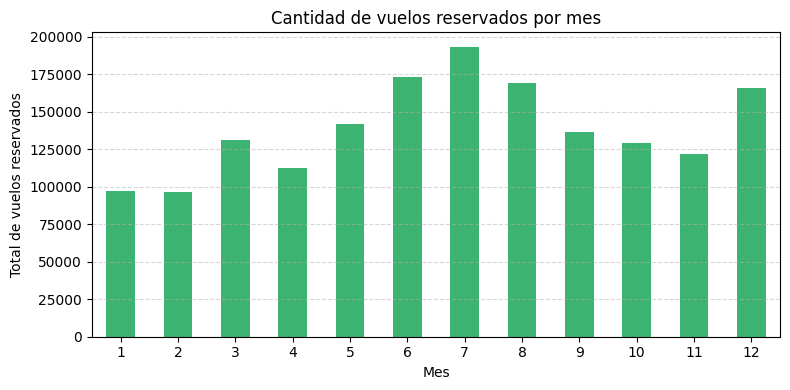

In [119]:
# 2. Lo represento con un grafico de barras 


plt.figure(figsize=(8,4))  # selecciono el tamaño del grafico
vuelos_por_mes.plot(kind='bar', color='mediumseagreen')  # kind = "bar" -> barras verticales  y escojo el color que quiero para el grafico, hay otros colores, skyblue, coral, gold... 
plt.title('Cantidad de vuelos reservados por mes')
plt.xlabel('Mes')
plt.ylabel('Total de vuelos reservados')
plt.xticks(rotation=0)  # ajusto la rotacion de los numeros de los meses del año para que se vean rectos.
plt.grid(axis='y', linestyle='--', alpha=0.5) #añado lineas horizontales en el eje Y con axis, que sean discontinua y con alpha= 0.5 -> semitransparente
plt.tight_layout(); # ajusto margenes para que no se corte nada.




# ✅ Tipo de gráfico seleccionado: **Gráfico de barras**

- Permite **comparar cantidades entre categorías** discretas (en este caso, los meses del año).
- Muestra con claridad las diferencias entre los meses.
- Es más legible que un gráfico circular (pie) para 12 categorías y más adecuado que una línea, ya que no se trata de una serie temporal continua.

### 📊 Análisis: Distribución de vuelos reservados por mes

Durante el análisis de la distribución mensual de vuelos reservados, se ha representado un gráfico de barras que muestra el total de reservas realizadas en cada mes del año. En la visualización se aprecia claramente una estacionalidad en el comportamiento de los usuarios.

Los meses de verano, especialmente julio, seguido por junio y agosto, destacan como los períodos con mayor volumen de vuelos reservados. Este patrón es coherente con las vacaciones estivales, tanto escolares como laborales, en las que muchas personas aprovechan para viajar, lo que provoca un aumento significativo de la demanda.

Otro pico relevante se observa en diciembre, mes asociado a las celebraciones navideñas y de fin de año, durante el cual también es habitual que se realicen desplazamientos familiares o de ocio.

Por otro lado, los meses de enero y febrero presentan los niveles más bajos de reservas. Esto puede deberse a la conocida "cuesta de enero", un periodo posterior a las fiestas en el que muchas personas ajustan su presupuesto. Además, el clima invernal podría influir negativamente en las decisiones de viaje, reduciendo así la demanda.

En conjunto, el gráfico refleja cómo los hábitos de viaje varían a lo largo del año, estando fuertemente condicionados por factores como las vacaciones, las festividades y el contexto económico


# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

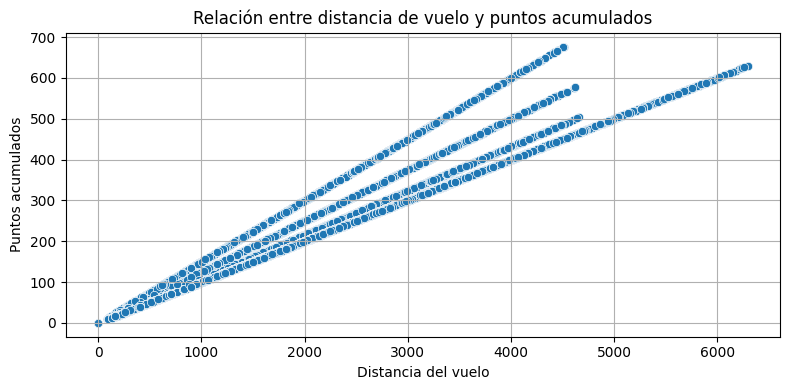

In [130]:
# Columnas que necesito: "Distance" (num)-> me da la distancia del vuelo o vuelos recorridos ese mes,  " Points Acumulated"(num) -> puntos acumulados ese mes
# Utilizare un scatterplot (dispersion) porque se trata de dos variables numericas y puedo ver asi si hay una relacion lineal o no.

# scatterplot:

plt.figure(figsize=(8,4))  # defino el tamaño del grafico.
sns.scatterplot(data=df_unido, x='Distance', y='Points Accumulated') # le digo que df utilizar y que columnas en que eje 
plt.title('Relación entre distancia de vuelo y puntos acumulados')
plt.xlabel('Distancia del vuelo')
plt.ylabel('Puntos acumulados')
plt.grid(True) # añado lineas horizontales y verticales 
plt.tight_layout();

# si utilizo "regplot" se sobrecarga porque ya es muy clara la tendencia.



# Interpretación:

En la visualización se observa una **relación lineal positiva muy clara y marcada**.  
Los puntos siguen trayectorias diagonales bien definidas, lo cual indica que a **mayor distancia recorrida**, los clientes **acumulan más puntos**.

Esta relación es lógica dentro del contexto de un programa de fidelización, donde los puntos suelen asignarse en función de la distancia volada.

Existe una **correlación directa, sistemática y consistente** entre ambas variables. Esto sugiere que la asignación de puntos por vuelo se realiza siguiendo una fórmula clara y estable en función de la distancia.


# 3. ¿Cuál es la distribución de los clientes por provincia o estado?

- quiero ver cuantos clientes hay en cada provincia 

In [141]:
# columnas que necesito "province"(categ) -> para saber en que provincia esta cada cliente  y  "Loyalty Numer"(num) -> para identificar a los clientes unicos.

clientes_unicos = df_unido[['Loyalty Number', 'Province']].drop_duplicates()

df_clientes = clientes_unicos['Province'].value_counts().reset_index() # cuento las provincias y con reset_index lo convierto en DF
df_clientes.columns = ['Province', 'Customers'] # le doy nombres claros a las columnas del nuevo df

df_clientes

# clientes_unicos: En "df_unido" cada cliente puede aparecer varias veces (una por cada actividad mensual), por lo que necesito contar cada cliente una sola vez, ya que su provincia no cambia. 
# Por eso aplico `drop_duplicates()` sobre las columnas `['Loyalty Number', 'Province']`

,Province,Customers
0,Ontario,5404
1,British Columbia,4409
2,Quebec,3300
3,Alberta,969
4,Manitoba,658
5,New Brunswick,636
6,Nova Scotia,518
7,Saskatchewan,409
8,Newfoundland,258
9,Yukon,110


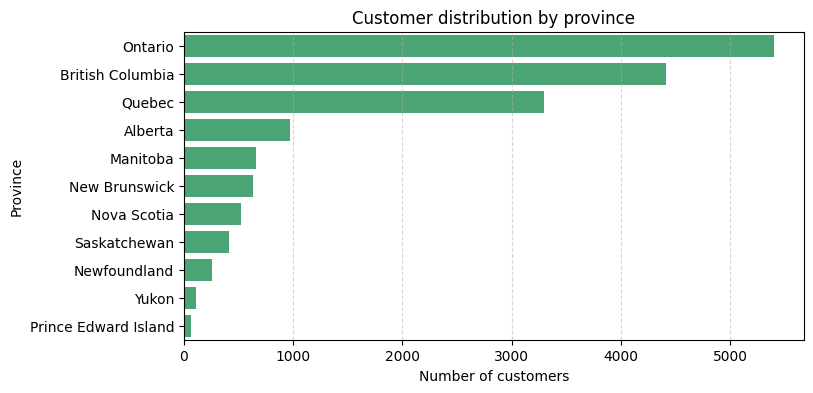

In [147]:
# GRAFICO: Aunque el enunciado pide distribucion se refiere a una distribucion por categoria no a una distribucion estadistica por lo que usare un BARPLOT o grafico de barras.
# variable categorica -> province 
# frecuencia -> cantidad de clientes

plt.figure(figsize=(8,4)) 
sns.barplot(x='Customers', y='Province', data = df_clientes, color='mediumseagreen')
plt.title('Customer distribution by province')
plt.xlabel('Number of customers')
plt.ylabel('Province')
plt.grid(axis='x', linestyle='--', alpha=0.5); # aplico una linea discontinua en el eje x y semitransparente (alpha = 0.5) para verlo mas claro.




El gráfico muestra una **distribución claramente desigual** entre las diferentes regiones. Las provincias con mayor número de clientes son:
- **Ontario**, con diferencia, es la provincia con más clientes registrados.
- Le siguen **British Columbia** y **Quebec**, también con una alta concentración de clientes.

Por otro lado, provincias como **Yukon**, **Newfoundland** y **Prince Edward Island** tienen una representación significativamente menor.
Este tipo de distribución puede deberse a varios factores como la densidad de población, la infraestructura aérea disponible o el enfoque comercial de la compañía en determinadas regiones.

La mayor parte de los clientes se concentra en unas pocas provincias, lo cual puede ser clave para orientar decisiones de negocio, campañas de fidelización o expansión de servicios.

# 4.  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

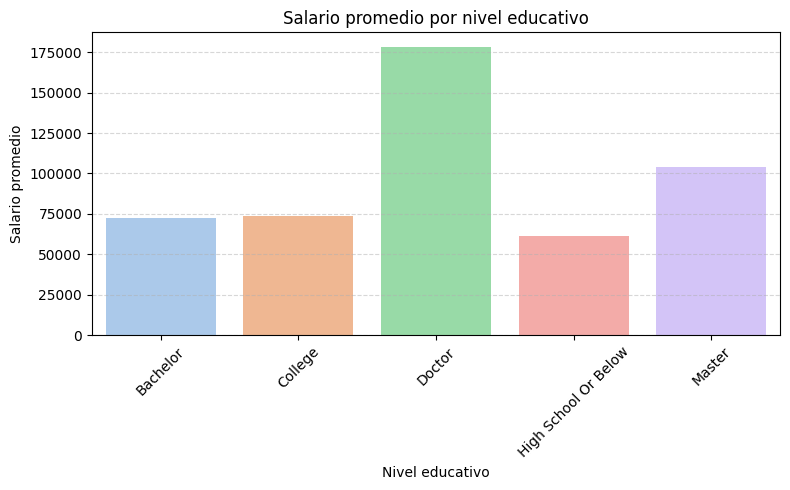

In [162]:
# columnas que voy a necesitar: "Salary" -> salario(numerica), "Education" -> nivel educativo (categorica)
# quiero comparar la media de los salarios en distintos los distintos grupos segun los niveles educativos (categoricos)
# esto me indica que debo usar un BARPLOT ya que calcula la media de la variable numerica (salary) para cada nivel de educacion.

# Agrupo por nivel educativo y calculo la media de salario
salario_medio = df_unido.groupby('Education')['Salary'].mean().reset_index()

# Ahora hago el grafico con seaborn -> barlplot
plt.figure(figsize=(8,5))  # fijo el tamaño que quiero
sns.barplot(x='Education', y='Salary', data=salario_medio, palette='pastel') # le doy a los ejes las columnas necesarias y a data le doy el salario medio ya calculado.
plt.title('Salario promedio por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.grid(axis='y', linestyle='--', alpha=0.5) # añado linea desde eje y (horizontales)
plt.xticks(rotation=45) # roto los nombres del eje x para que no se monten entre si.
plt.tight_layout(); # ajusto margenes 




###  Salario promedio por nivel educativo

El gráfico muestra cómo varía el salario promedio de los clientes en función de su nivel educativo. Se observa una **tendencia clara**: a mayor nivel educativo, mayor salario promedio.

- Los clientes con **Doctorado** son los que presentan el salario promedio más alto.
- Les siguen aquellos con **Master**, también con ingresos elevados.
- **Bachelor** y **College** muestran salarios similares, en un rango medio.
- El grupo **High School or Below** tiene el salario promedio más bajo.

Esta distribución es coherente con lo esperado, reflejando que **la formación académica tiene un impacto positivo en los ingresos** de los clientes.


# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [ ]:
# columnas que voy a necesitar:  "Loyalty Card" (categ)-> indica el tipo de tarjeta de fidelidad del cliente y "loyalty Numer" (num)-> para tener los clientes

clientes_tarjetas = df_unido[['Loyalty Number', 'Loyalty Card']].drop_duplicates()

# como he hecho con cliente y provincia -> clientes_tarjetas: En "df_unido" cada cliente puede aparecer varias veces (una por cada actividad mensual), 
# por lo que necesito contar cada cliente una sola vez, ya que su tipo de tarjeta no cambia. 

In [169]:
clientes_tarjetas

,Loyalty Number,Loyalty Card
0,100018,Aurora
1,100102,Nova
2,100140,Nova
3,100214,Star
4,100272,Star
...,...,...
402167,998972,Nova
402651,999304,Nova
402874,999731,Star
403255,999788,Nova


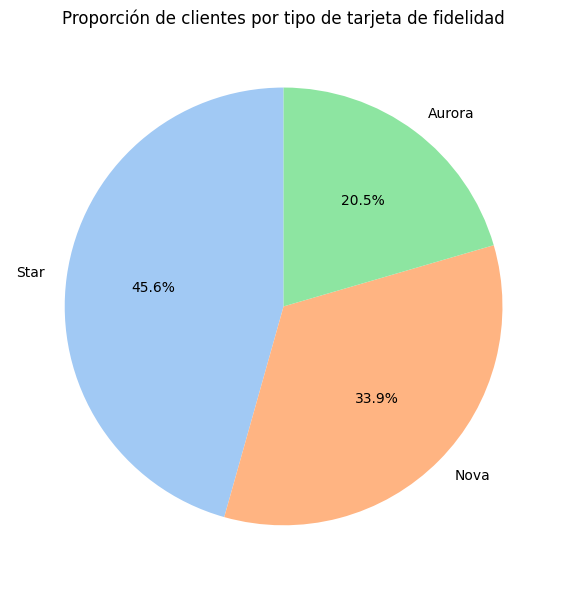

In [ ]:

# Paso 1: Obtener valores y etiquetas
valores = clientes_tarjetas['Loyalty Card'].value_counts().values # con .values -> saco el numero o cantidad de clientes con esa tarjeta (p.ej: 7637, 5671, 3429)
labels = clientes_tarjetas['Loyalty Card'].value_counts().index # con .index  -> saco el nombre de cada tipo de tarjeta (Star, Nova o Aurpra) label =etiqueta

# Paso 2: Crear el gráfico
plt.figure(figsize=(6,6))
plt.pie(
    valores,         # Tamaño de cada porción (número de clientes)
    labels=labels,    # Etiquetas (tipos de tarjeta)
    autopct='%1.1f%%',  # Muestro el porcentaje con 1 decimal
    startangle=90,    # Giro el gráfico para empezar desde arriba
    colors=sns.color_palette('pastel'),  # Colores suaves
)
plt.title('Proporción de clientes por tipo de tarjeta de fidelidad')
plt.tight_layout(); # ajusto margenes           



# Proporción de clientes por tipo de tarjeta de fidelidad

Se puede observar que:

- La tarjeta **Star** es la más común, representando aproximadamente **el 45.6%** de los clientes.
- Le sigue **Nova**, con un **33.9%**, también con una presencia significativa.
- **Aurora** es la menos frecuente, con un **20.5%** del total.

Esta distribución revela que **casi el 80%** de los clientes se reparten entre las tarjetas Star y Nova, lo que puede ser clave para enfocar campañas de marketing, promociones exclusivas o mejoras en los programas de fidelización más populares.


# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

    - Utilizare un countplot() agrupando por Genero (en hue= Gender) porque permte comparar los valores dentro de cada categoria (mujeres y hombres dentro de married)y tambien comparar entre ellas (solteros vs casados) y ambas son columnas categoricas 

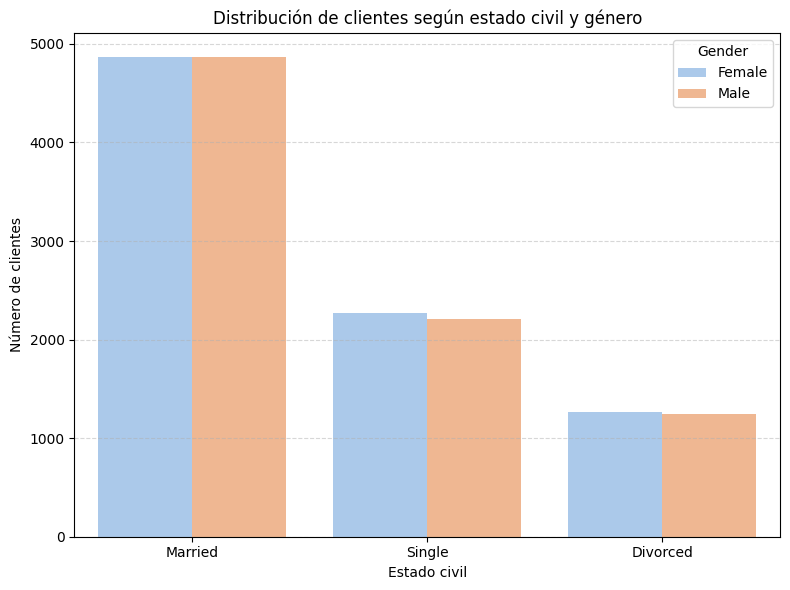

In [182]:
# columnas que necesito: Gender -> genero Male/Female (cat), Marital Status -> Married/Single/Divorced (cat), Loyalty Number -> para contar los clientes y no duplicar
# como he hecho antes para no duplicar clientes, junto las tres columnas que necesito y elimino los duplicados.

# Creo el DataFrame de clientes únicos
clientes_estado = df_unido[['Loyalty Number', 'Gender', 'Marital Status']].drop_duplicates() #Hago un DF que tiene únicamente una fila por cliente con su género y estado civil

plt.figure(figsize=(8,6)) # tamaño del grafico
sns.countplot(data=clientes_estado, x='Marital Status', hue='Gender', palette='pastel') # con hue= Gender -> agrupo las barras por genero 
plt.title('Distribución de clientes según estado civil y género')
plt.xlabel('Estado civil')
plt.ylabel('Número de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.5) # pongo en el eje Y linea discontinua clara
plt.tight_layout(); # ajusto margenes




# Interpretación del gráfico

- La categoría **Married** (casados) es la más numerosa, tanto para hombres como para mujeres.  
- Le sigue el grupo **Single** (solteros), con un número ligeramente menor pero también equilibrado por género.  
- El grupo **Divorced** (divorciados) es el menos común, pero nuevamente con una distribución casi igual entre hombres y mujeres.

En general, se observa una distribución **muy equilibrada entre géneros** en todos los estados civiles.  
Esto sugiere que el **género no parece influir significativamente** en la proporción de clientes según estado civil en este conjunto de datos.
